<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Filtering" data-toc-modified-id="Filtering-1">Filtering</a></span><ul class="toc-item"><li><span><a href="#Filter-out-dangling-ends-and-self-circles" data-toc-modified-id="Filter-out-dangling-ends-and-self-circles-1.1">Filter out dangling ends and self-circles</a></span></li><li><span><a href="#Apply-filters-on-the-data" data-toc-modified-id="Apply-filters-on-the-data-1.2">Apply filters on the data</a></span><ul class="toc-item"><li><span><a href="#Evaluate-changes" data-toc-modified-id="Evaluate-changes-1.2.1">Evaluate changes</a></span></li></ul></li><li><span><a href="#Save-to-BAM" data-toc-modified-id="Save-to-BAM-1.3">Save to BAM</a></span></li></ul></li></ul></div>

# Filtering

## Filter out dangling ends and self-circles

In [10]:
from pytadbit.mapping.filter import filter_reads

In [17]:
cell = 'mouse_PSC'  # or mouse_PSC
rep = 'rep2'  # or rep2

The `max_molecule_length` parameter used to filter-out pseudo-dangling-ends can be extracted from the previous section in the computation of insert size.

The `min_distance_to_re`, that affects the detection of random breaks, should be a bit larger in order to contain almost all the fragments.

In [18]:
# this will last ~10 minutes
masked = filter_reads(
    'results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(cell, rep), 
    max_molecule_length=750, over_represented=0.005, max_frag_size=100000, 
    min_frag_size=100, re_proximity=5, min_dist_to_re=1000)

Filtered reads (and percentage of total):

                   Mapped both  :   10,467,800 (100.00%)
  -----------------------------------------------------
   1-               self-circle :        7,140 (  0.07%)
   2-              dangling-end :      436,314 (  4.17%)
   3-                     error :        2,727 (  0.03%)
   4-        extra dangling-end :    1,967,996 ( 18.80%)
   5-        too close from RES :    2,913,350 ( 27.83%)
   6-                 too short :    1,299,943 ( 12.42%)
   7-                 too large :           81 (  0.00%)
   8-          over-represented :      235,462 (  2.25%)
   9-                duplicated :       43,045 (  0.41%)
  10-             random breaks :        5,230 (  0.05%)


This generates a dictionary with the different filters and the reads affected by each.

## Apply filters on the data

In [19]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(cell, rep), 
             'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), masked, 
             filters=[1, 2, 3, 4, 6, 7, 8, 9, 10])

    saving to file 7,036,721 reads without.


7036721

### Evaluate changes

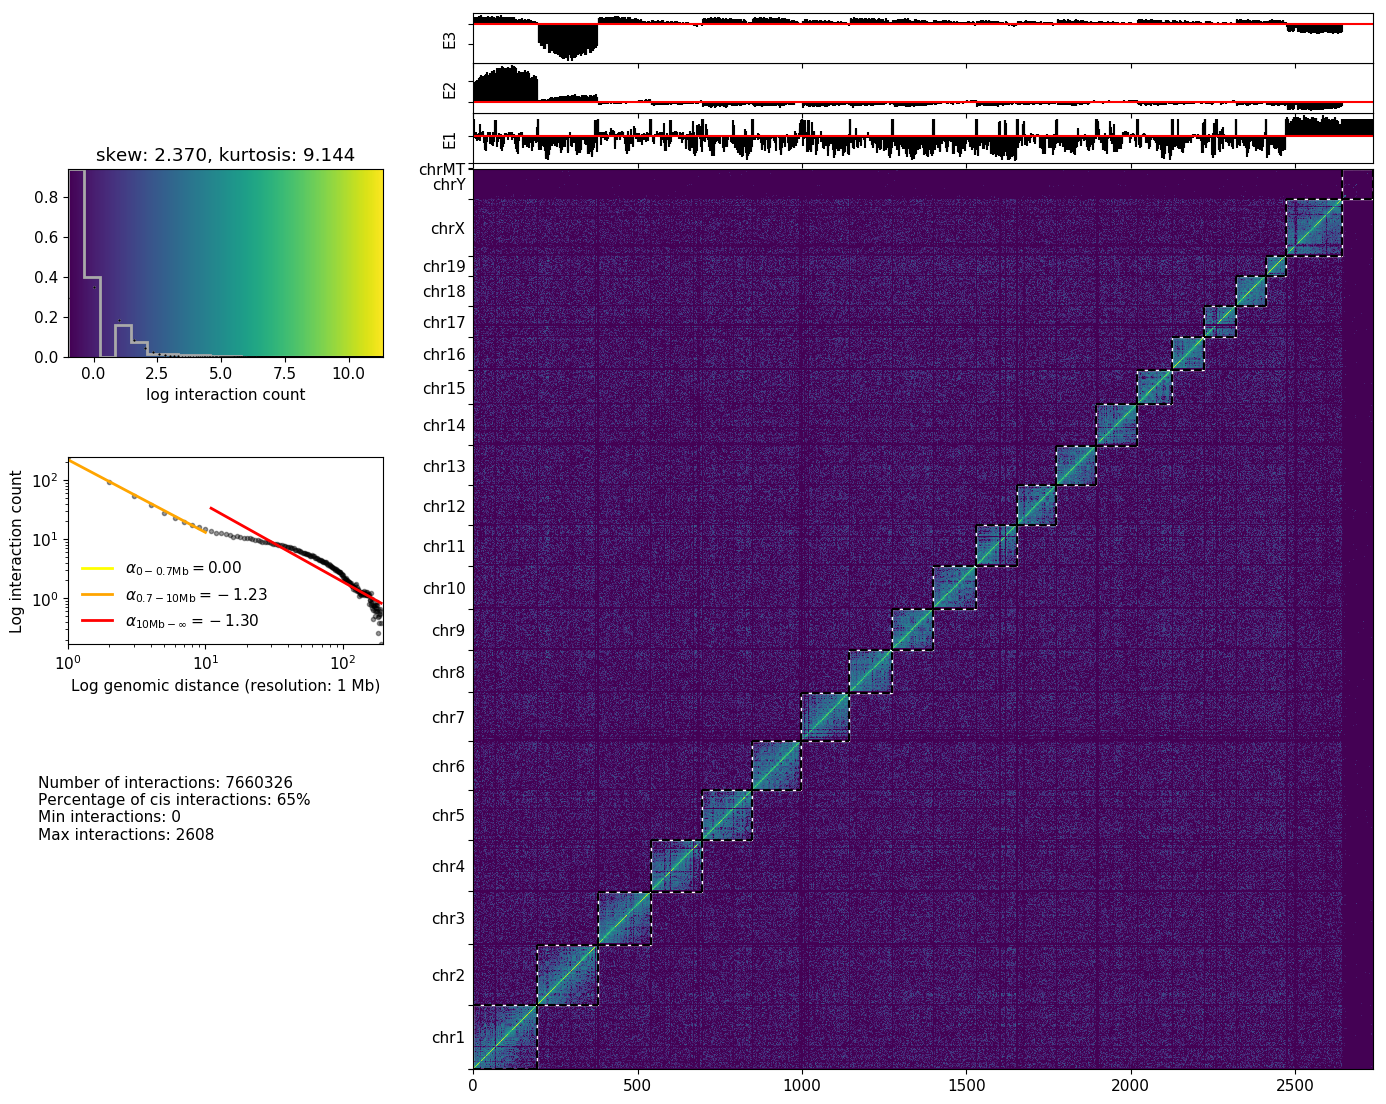

In [5]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
        resolution=1000000, show=True, cmap='viridis')

Zoom to a single chromosome or a region:

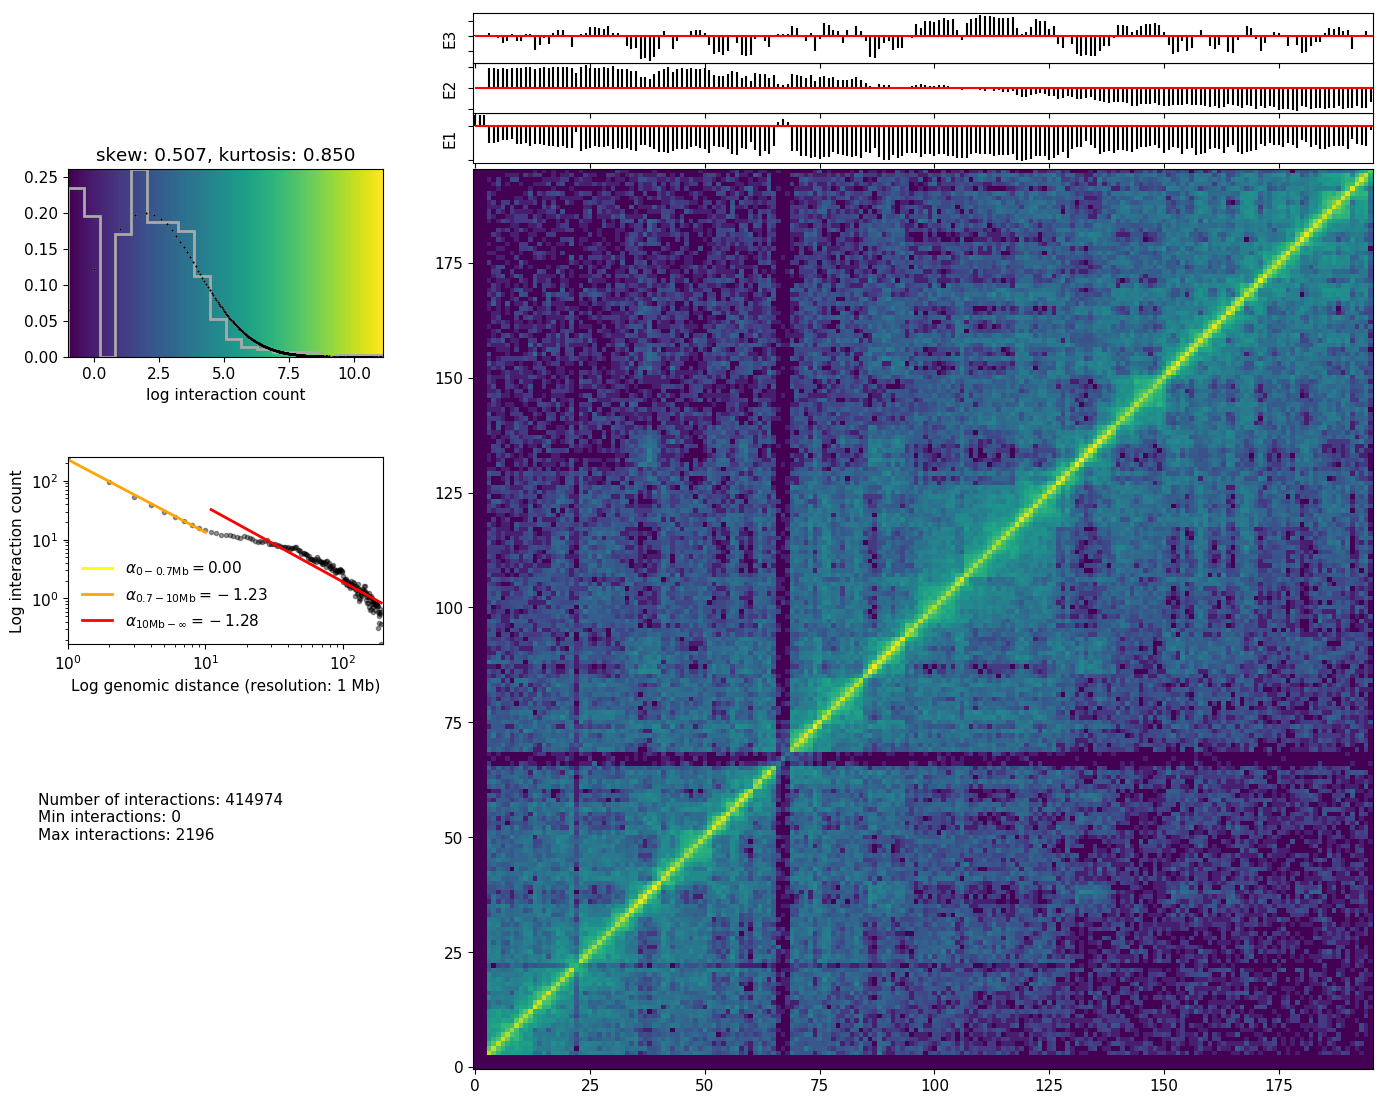

In [6]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
        resolution=1000000, show=True, focus='chr1', cmap='viridis')

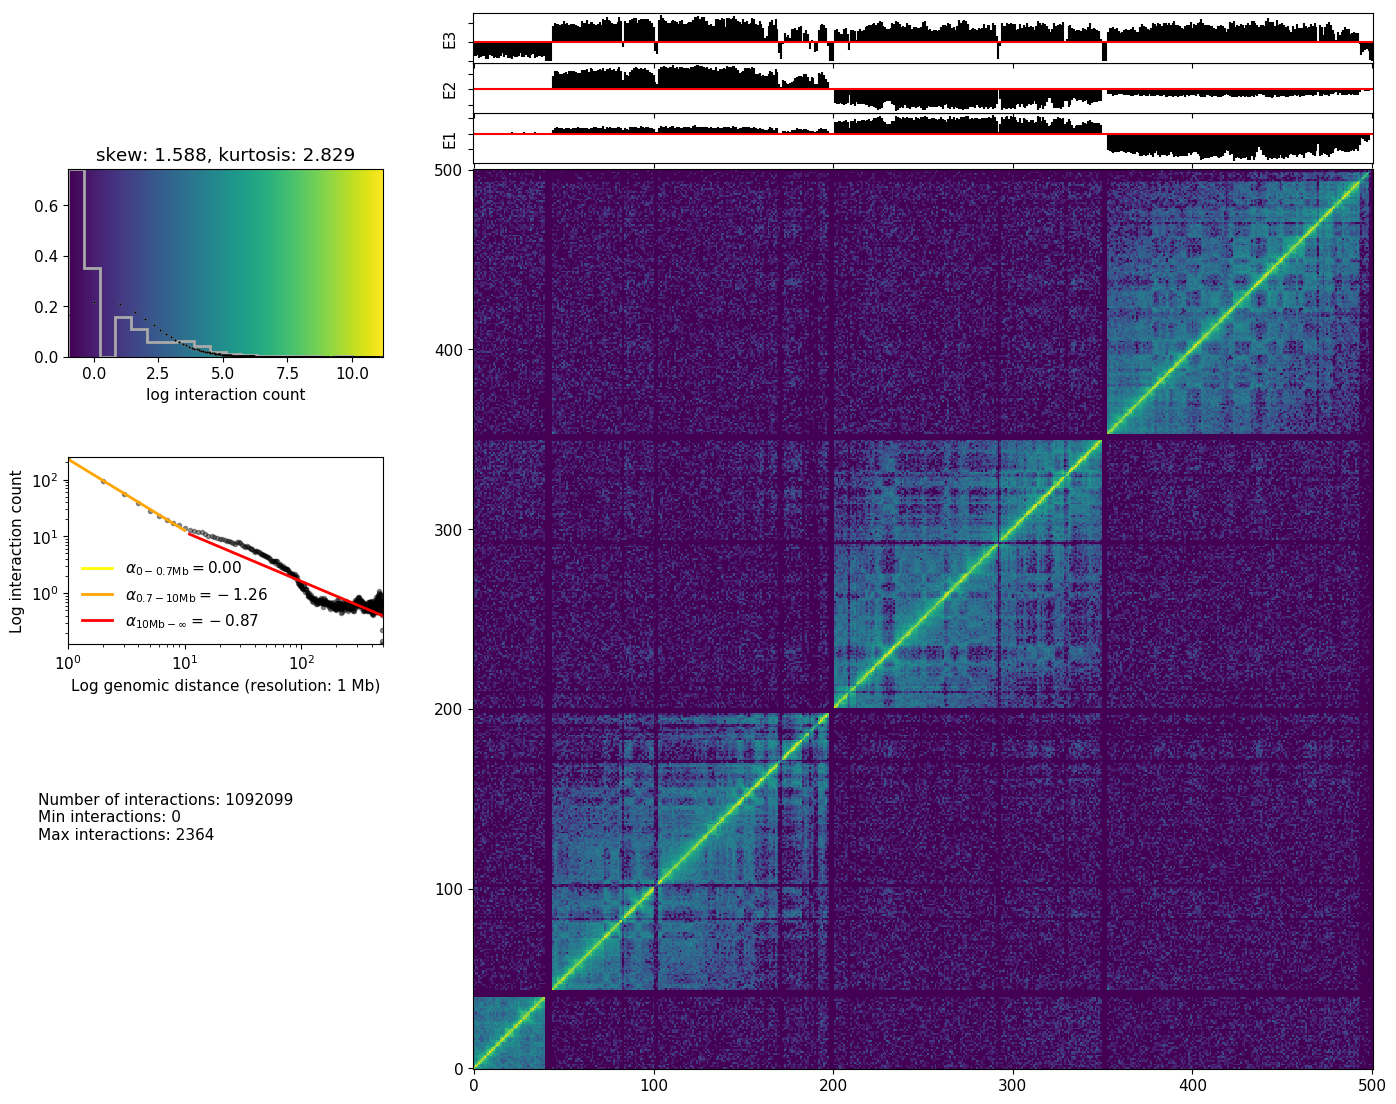

In [7]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
        resolution=1000000, show=True, focus=(500, 1000), cmap='viridis')

## Save to BAM

In [8]:
from pytadbit.parsers.hic_bam_parser import bed2D_to_BAMhic

In [9]:
bed2D_to_BAMhic('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep), 
                valid=True, ncpus=8, 
                outbam='results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}'.format(cell, rep), 
                frmt='mid', masked=None)